<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# <u><b>Capstone:</b></u> Recommending adjacent jobs to platfrom delivery riders using NLP and consine similarity

--- 
### Part 2: Clean adjacent job - Attendant job postings from jobsites
---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from matplotlib_venn import venn2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity 

# user-defined functions
from eda_utils import show_missing, clean_string, get_top_post

In [2]:
# load scrapped job postings
posts=pd.read_csv('../Data/9625_Attendants.csv') 

In [3]:
posts

,job_exp_required,job_title,job_ssoc,job_description,job_salary
0,1,BUS ATTENDANT,96256,TO ENSURE ALL CHILDREN ARE SAFELY BOARDED THE ...,225.0
1,10,LABORATORY ASSISTANT HISTOPATHOLOGY,96252,YOU WILL PERFORM A VARIETY OF DUTIES ASSOCIATE...,1525.0
2,2,HOSTEL SENIOR EXECUTIVE,96259,JOB DESCRIPTION TO BE RESPONSIBLE FOR THE EFFI...,2600.0
3,1,OFFICE ATTENDANT S PER MONTH PIONEER,96251,JOB DESCRIPTION MANAGE OFFICE SUPPLIES AND ISS...,2030.5
4,1,HOTEL ATTENDANT,96259,RESPONSIBLE FOR GENERAL CLEANING OF THE COMMON...,2275.0
...,...,...,...,...,...
284,0,HEALTH ATTENDANT OCCUPATIONAL THERAPY,96253,TO ASSIST THE OCCUPATIONAL THERAPISTS AND THER...,1657.5
285,2,NURSING AIDE,96253,JOB DESCRIPTION RUNNING THE DAY TO DAY OPERATI...,1350.0
286,2,NURSING AIDE,96253,JOB DESCRIPTION ASSIST RESIDENTS TO GO THROUGH...,2100.0
287,2,NURSING AIDE,96253,WHAT YOU WILL DO YOU ARE RESPONSIBLE FOR CARIN...,1850.0


In [4]:
posts['job_salary'].quantile([0.25, 0.5, 0.75])

0.25    1550.0
0.50    1800.0
0.75    2050.0
Name: job_salary, dtype: float64

In [5]:
posts['job_exp_required'].quantile([0.25, 0.5, 0.75])

0.25    0.0
0.50    1.0
0.75    1.0
Name: job_exp_required, dtype: float64

In [6]:
posts=posts[['job_description']].copy(deep=True)
posts['job_description']=posts['job_description'].map(lambda x: x.lower().strip())

In [7]:
show_missing(posts)

,variable,dtype,count,nunique,missing,pc_missing
0,job_description,object,289,289,0,0.0


In [8]:
# Proprocess title_text
posts['job_desc_proc']=posts['job_description'].map(lambda x: clean_string(x, stem='spacy'))

# have explored using NLTK's stemming and lemmazitaion as well. spaCy's lemmazitation produces better results. 
# spaCy lemmatization is better than NLTK lemmatization as it takes into account part-of-speech tag by default
# lemmatization is better than stemming as context of text is important for this analysis.

In [9]:
posts

,job_description,job_desc_proc
0,to ensure all children are safely boarded the ...,ensure child safely board bus ensure child pro...
1,you will perform a variety of duties associate...,perform variety associate routine laboratory p...
2,job description to be responsible for the effi...,responsible efficient operation operation aspe...
3,job description manage office supplies and iss...,manage office supply issue stationery staff pe...
4,responsible for general cleaning of the common...,responsible general clean common public area h...
...,...,...
284,to assist the occupational therapists and ther...,assist occupational therapist therapy assistan...
285,job description running the day to day operati...,run day day operation homecentre attend genera...
286,job description assist residents to go through...,assist resident hand washing regime meal assis...
287,what you will do you are responsible for carin...,responsible caring patient stable end life con...


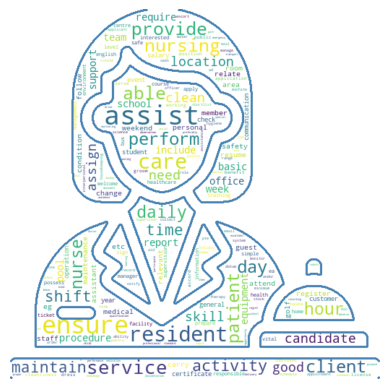

<Figure size 640x480 with 0 Axes>

In [10]:
# Read the whole text.
text = ' '.join(posts['job_desc_proc'])
# read the mask image
van_mask = np.array(Image.open('../Pictures/receptionist.png'))

wc = WordCloud(background_color="white", max_words=200, mask=van_mask, collocations=False, contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

In [11]:
# CountVectorizer simply counts the number of times a word appears in a document (using a bag-of-words approach), 
# while TF-IDF Vectorizer takes into account not only how many times a word appears in a document 
# but also how important that word is to the whole corpus. TF-IDF Vectorizer is used below:

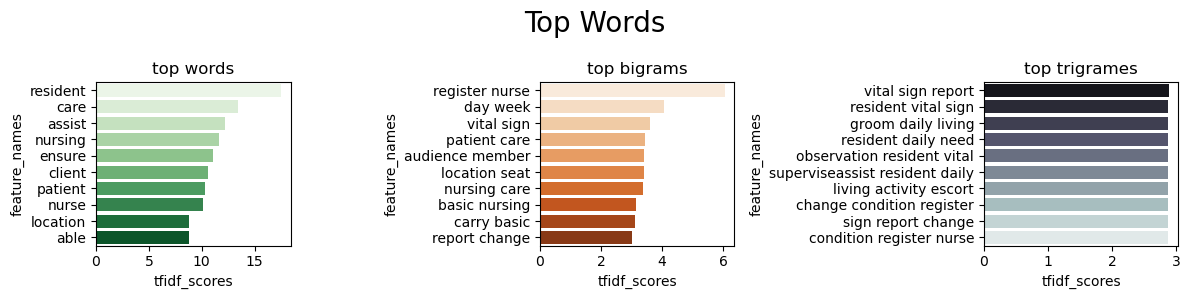

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))

g1=sns.barplot(data=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[0], palette='Greens')
g1.set_title(f'top words')

g2=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(2,2), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[1], palette='Oranges')
g2.set_title(f'top bigrams')

g3=sns.barplot(data=get_top_post(input=posts['job_desc_proc'], ngram_range=(3,3), n=10),
               y='feature_names', x='tfidf_scores', ax = ax[2], palette='bone')
g3.set_title(f'top trigrames')

plt.suptitle('Top Words', fontsize=20)
plt.tight_layout()

In [13]:
posts.to_csv('../Data/9625_Attendants_cleaned.csv', index=False) 

In [14]:
posts=pd.read_csv('../Data/9625_Attendants_cleaned.csv') 
base_posts=pd.read_csv('../Data/8322_GoodsVehicleDriver_cleaned.csv') 

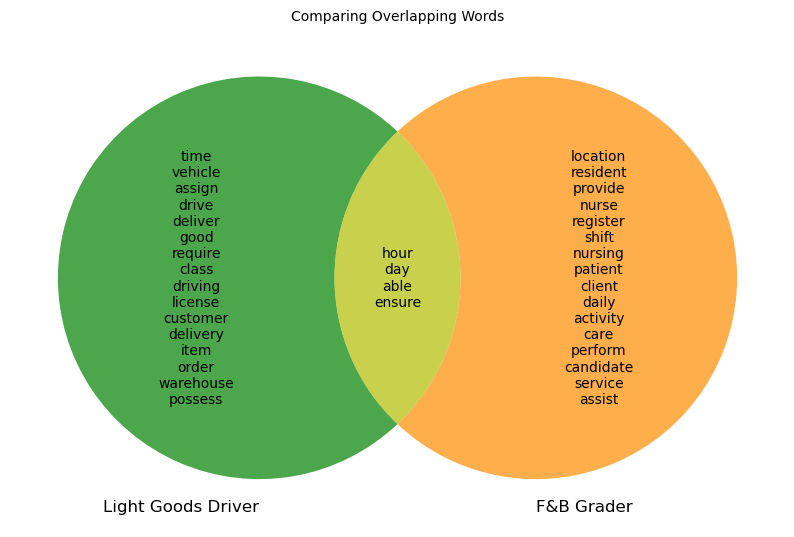

In [15]:
plt.figure(figsize=(10,10))
plt.title('Comparing Overlapping Words',fontsize=10)

set_a = set(get_top_post(input=base_posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])
set_b = set(get_top_post(input=posts['job_desc_proc'],ngram_range=(1,1),n=20)['feature_names'])

venn = venn2([set_a,set_b],set_labels=['Light Goods Driver','F&B Grader'],set_colors=('green', 'darkorange'), alpha = 0.7)
venn.get_label_by_id('100').set_text('\n'.join(map(str,set_a-set_b)))
venn.get_label_by_id('110').set_text('\n'.join(map(str,set_a&set_b)))
venn.get_label_by_id('010').set_text('\n'.join(map(str,set_b-set_a)))

In [16]:
base_top_words_df=get_top_post(base_posts['job_desc_proc'], ngram_range=(1,1), n=1000)
base_top_text = ' '.join(base_top_words_df['feature_names'])

top_words_df=get_top_post(posts['job_desc_proc'], ngram_range=(1,1), n=1000)
top_text = ' '.join(top_words_df['feature_names'])

In [17]:
df=pd.DataFrame(data={'jobs': ['base_job','adjacent_job'], 'top_text' : [base_top_text,top_text]})
count = CountVectorizer()
count_matrix = count.fit_transform(df['top_text'])
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.    0.579]
 [0.579 1.   ]]
